In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [83]:
# read the files
file_paths = {
    2023: 'Datasets/2023 Pollution Inventory Dataset V2.xlsx',
    2022: 'Datasets/2022 Pollution Inventory Dataset V2.xlsx',
    2021: 'Datasets/2021 Pollution Inventory Dataset.xlsx',
    2020: 'Datasets/2020 Pollution Inventory Dataset V2.xlsx',
    2019: 'Datasets/2019 Pollution Inventory Dataset V2.xlsx',
    2018: 'Datasets/2018 Pollution Inventory.xlsx',
    2017: 'Datasets/2017 Pollution Inventory Dataset.xlsx',
    2016: 'Datasets/2016 Pollution Inventory dataset - version 2.xlsx'
}
skiprows = 9
sheet_name = {2016: 1}  # treat 2016 specially

dfs = {}

for year, path in file_paths.items():
    dfs[year] = pd.read_excel(path, skiprows=skiprows, sheet_name=sheet_name.get(year, 0))

# check the columns
columns_check = {year: df.columns for year, df in dfs.items()}
columns_check


{2023: Index(['AUTHORISATION ID / PERMIT ID', 'ACTIVITY DESCRIPTION', 'OPERATOR NAME',
        'SITE ADDRESS', 'SITE POSTCODE', 'EASTING', 'NORTHING', 'EA AREA NAME',
        'ROUTE NAME', 'SUBSTANCE NAME', 'REPORTING THRESHOLD (kg)',
        'QUANTITY RELEASED (kg)', 'REGULATED INDUSTRY SECTOR',
        'REGULATED INDUSTRY SUB SECTOR'],
       dtype='object'),
 2022: Index(['AUTHORISATION ID / PERMIT ID', 'ACTIVITY DESCRIPTION', 'OPERATOR NAME',
        'SITE ADDRESS', 'SITE POSTCODE', 'EASTING', 'NORTHING', 'EA AREA NAME',
        'ROUTE NAME', 'SUBSTANCE NAME', 'REPORTING THRESHOLD (kg)',
        'QUANTITY RELEASED (kg)', 'REGULATED INDUSTRY SECTOR',
        'REGULATED INDUSTRY SUB SECTOR'],
       dtype='object'),
 2021: Index(['AUTHORISATION ID / PERMIT ID', 'ACTIVITY DESCRIPTION', 'OPERATOR NAME',
        'SITE ADDRESS', 'SITE POSTCODE', 'EASTING', 'NORTHING', 'EA AREA NAME',
        'ROUTE NAME', 'SUBSTANCE NAME', 'REPORTING THRESHOLD (kg)',
        'QUANTITY RELEASED (kg)', 'RE

In [85]:
dfs[2017]

,AUTHORISATION ID / PERMIT ID,ACTIVITY DESCRIPTION,OPERATOR NAME,SITE ADDRESS,SITE POSTCODE,EASTING,NORTHING,EA AREA NAME,ROUTE NAME,SUBSTANCE NAME,REPORTING THRESHOLD (kg),QUANTITY RELEASED (kg),REGULATED INDUSTRY SECTOR,REGULATED INDUSTRY SUB SECTOR
0,BU0834IP,"WASTE LANDFILLING; >10 T/D WITH CAPACITY >25,0...",Waste Recycling Group (Central) Limited,Edwin Richards Quarry EDWIN RICHARDS LANDFILL ...,B65 9BT,396500.0,288200.0,West Midlands,Air,Methane,10000.00000,141000,Landfill,Non Hazardous Landfill
1,BU0834IP,"WASTE LANDFILLING; >10 T/D WITH CAPACITY >25,0...",Waste Recycling Group (Central) Limited,Edwin Richards Quarry EDWIN RICHARDS LANDFILL ...,B65 9BT,396500.0,288200.0,West Midlands,Air,Nitrogen oxides (NO and NO2) as NO2,100000.00000,Below Reporting Threshold,Landfill,Non Hazardous Landfill
2,BU0834IP,"WASTE LANDFILLING; >10 T/D WITH CAPACITY >25,0...",Waste Recycling Group (Central) Limited,Edwin Richards Quarry EDWIN RICHARDS LANDFILL ...,B65 9BT,396500.0,288200.0,West Midlands,Air,"Tetrachloroethane (1,1,2,2-Tetrachloroethane)",10.00000,Below Reporting Threshold,Landfill,Non Hazardous Landfill
3,BU0834IP,"WASTE LANDFILLING; >10 T/D WITH CAPACITY >25,0...",Waste Recycling Group (Central) Limited,Edwin Richards Quarry EDWIN RICHARDS LANDFILL ...,B65 9BT,396500.0,288200.0,West Midlands,Air,"Butadiene (1,3-Butadiene)",100.00000,Below Reporting Threshold,Landfill,Non Hazardous Landfill
4,BU0834IP,"WASTE LANDFILLING; >10 T/D WITH CAPACITY >25,0...",Waste Recycling Group (Central) Limited,Edwin Richards Quarry EDWIN RICHARDS LANDFILL ...,B65 9BT,396500.0,288200.0,West Midlands,Air,Tetrachloroethylene (PER),100.00000,Below Reporting Threshold,Landfill,Non Hazardous Landfill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31964,BP3736HA,THE INCINERATION OF NON-HAZARDOUS WASTE IN AN ...,Veolia Bioenergy UK Limited,Chilton BioMass Plant Chilton Industrial Estat...,DL170SD,428140.0,530390.0,North East,Air,Nickel,10.00000,Below Reporting Threshold,EfW,EfW
31965,BP3736HA,THE INCINERATION OF NON-HAZARDOUS WASTE IN AN ...,Veolia Bioenergy UK Limited,Chilton BioMass Plant Chilton Industrial Estat...,DL170SD,428140.0,530390.0,North East,Air,Chlorine and inorganic chlorine compounds - as...,10000.00000,Below Reporting Threshold,EfW,EfW
31966,BP3736HA,THE INCINERATION OF NON-HAZARDOUS WASTE IN AN ...,Veolia Bioenergy UK Limited,Chilton BioMass Plant Chilton Industrial Estat...,DL170SD,428140.0,530390.0,North East,Air,Fluorine and inorganic fluorine compounds - as HF,1000.00000,Below Reporting Threshold,EfW,EfW
31967,BP3736HA,THE INCINERATION OF NON-HAZARDOUS WASTE IN AN ...,Veolia Bioenergy UK Limited,Chilton BioMass Plant Chilton Industrial Estat...,DL170SD,428140.0,530390.0,North East,Air,Non-methane volatile organic compounds (NMVOCs),10000.00000,Below Reporting Threshold,EfW,EfW


In [86]:
# Save the results processed each year
copper_data = {}

for year, df in dfs.items():
    df_filtered = df[df['SUBSTANCE NAME'].str.upper() == 'COPPER'].copy()

    df_filtered['QUANTITY RELEASED (kg)'] = pd.to_numeric(df_filtered['QUANTITY RELEASED (kg)'], errors='coerce')
    df_filtered = df_filtered.dropna(subset=['QUANTITY RELEASED (kg)'])
    copper_data[year] = df_filtered


In [87]:
summary_stats = []
all_quantities = []
all_sites = []

years = file_paths.keys()

for year in years:
    df = copper_data.get(year)
    all_data = dfs[year]
    
    if df is None or df.empty:
        continue  # skip empty
    
    # Keep all records without filtering
    df['QUANTITY RELEASED (kg)'] = pd.to_numeric(df['QUANTITY RELEASED (kg)'], errors='coerce')
    quantity = df['QUANTITY RELEASED (kg)']
    
    all_quantities.append(quantity)
    all_sites.append(df[['EA AREA NAME']])

    reporting_thresholds = df['REPORTING THRESHOLD (kg)'].dropna().unique()

    stats = {
        'Year': year,
        'Total Quantity Released': quantity.sum(skipna=True),
        'Mean': quantity.mean(skipna=True),
        'Standard deviation': quantity.std(skipna=True),
        'Min': quantity.min(skipna=True),
        'Max': quantity.max(skipna=True),
        '5th Percentile': np.nanpercentile(quantity, 5),
        '10th Percentile': np.nanpercentile(quantity, 10),
        '25th Percentile': np.nanpercentile(quantity, 25),
        '50th Percentile': np.nanpercentile(quantity, 50),
        '75th Percentile': np.nanpercentile(quantity, 75),
        '90th Percentile': np.nanpercentile(quantity, 90),
        '95th Percentile': np.nanpercentile(quantity, 95),
        'Reporting Threshold': reporting_thresholds[0] if len(reporting_thresholds) > 0 else np.nan,
        'Nb of Obs': len(df),  
        'Nb obs with numeric value': quantity.notna().sum(), # Can be used for statistics
        'NB of obs below reporting threshold': sum(
            (all_data['SUBSTANCE NAME'].str.upper() == 'COPPER') &
            (all_data['QUANTITY RELEASED (kg)'].astype(str).str.upper() == 'BELOW REPORTING THRESHOLD')
        ),
        'Nb of different sites': df['EA AREA NAME'].nunique(),
        'Mean nb years per sites': df['EA AREA NAME'].value_counts().mean()
    }
    
    summary_stats.append(stats)

# Merge the data of all years
all_quantity_concat = pd.concat(all_quantities)
all_sites_concat = pd.concat(all_sites)

overall_stats = {
    'Year': 'All Years',
    'Total Quantity Released': all_quantity_concat.sum(skipna=True),
    'Mean': all_quantity_concat.mean(skipna=True),
    'Standard deviation': all_quantity_concat.std(skipna=True),
    'Min': all_quantity_concat.min(skipna=True),
    'Max': all_quantity_concat.max(skipna=True),
    '5th Percentile': np.nanpercentile(all_quantity_concat, 5),
    '10th Percentile': np.nanpercentile(all_quantity_concat, 10),
    '25th Percentile': np.nanpercentile(all_quantity_concat, 25),
    '50th Percentile': np.nanpercentile(all_quantity_concat, 50),
    '75th Percentile': np.nanpercentile(all_quantity_concat, 75),
    '90th Percentile': np.nanpercentile(all_quantity_concat, 90),
    '95th Percentile': np.nanpercentile(all_quantity_concat, 95),
    'Reporting Threshold': np.nan,
    'Nb of Obs': len(all_quantity_concat), 
    'Nb obs with numeric value': all_quantity_concat.notna().sum(),
    'NB of obs below reporting threshold': np.nan,  
    'Nb of different sites': all_sites_concat['EA AREA NAME'].nunique(),
    'Mean nb years per sites': all_sites_concat['EA AREA NAME'].value_counts().mean()
}

summary_stats.append(overall_stats)
summary_df = pd.DataFrame(summary_stats)
summary_df


,Year,Total Quantity Released,Mean,Standard deviation,Min,Max,5th Percentile,10th Percentile,25th Percentile,50th Percentile,75th Percentile,90th Percentile,95th Percentile,Reporting Threshold,Nb of Obs,Nb obs with numeric value,NB of obs below reporting threshold,Nb of different sites,Mean nb years per sites
0,2023,51666.60135,269.096882,600.768829,1.080000e-07,5830.0,3.68250,11.4000,30.950,85.1000,259.5,618.10000,1060.000,20.0,192,192,660.0,14,13.714286
1,2022,49700.73483,233.336783,554.916524,2.820000e-02,5810.0,6.18800,14.1402,31.339,75.0000,191.0,553.80000,798.872,20.0,213,213,649.0,14,15.214286
2,2021,55201.62373,257.951513,646.129904,0.000000e+00,7040.0,11.05500,18.5748,33.285,82.7000,208.5,531.40000,860.600,20.0,214,214,670.0,14,15.285714
3,2020,47175.47483,225.719975,574.985235,4.700000e-04,6365.0,3.35600,12.6402,27.320,77.4300,198.0,402.60400,738.600,20.0,209,209,681.0,14,14.928571
4,2019,51432.82506,228.590334,557.204208,0.000000e+00,6406.0,6.43200,12.6680,29.690,76.6300,207.0,477.80000,818.200,20.0,225,225,697.0,14,16.071429
5,2018,52502.77640,225.333804,565.403481,0.000000e+00,6610.0,0.96820,11.5600,31.200,82.1000,202.0,368.54468,740.800,10.0,233,233,692.0,14,16.642857
6,2017,53187.71530,225.371675,543.857040,5.390000e-09,6220.0,4.06425,11.7450,31.910,90.0925,198.0,401.85000,775.000,20.0,236,236,691.0,14,16.857143
7,2016,58727.24706,247.794291,628.865406,1.676000e-08,6590.0,2.53200,12.6182,30.440,85.0000,206.0,492.00000,774.600,20.0,237,237,694.0,14,16.928571
8,All Years,419594.99856,238.541784,583.663241,0.000000e+00,7040.0,3.79500,12.7962,30.860,82.3000,206.0,503.20000,810.800,NaN,1759,1759,NaN,14,125.642857


In [88]:
for year in years:
    print(f"{year}: {len(copper_data.get(year, []))} observations")


2023: 192 observations
2022: 213 observations
2021: 214 observations
2020: 209 observations
2019: 225 observations
2018: 233 observations
2017: 236 observations
2016: 237 observations


In [89]:
# Merge the data of all years (including the records of Below Threshold)
df_all_years = pd.concat([
    df[df['SUBSTANCE NAME'].str.upper() == 'COPPER'].copy().assign(Year=year)
    for year, df in dfs.items()
], ignore_index=True)


df_all_years['Above_Threshold'] = df_all_years['QUANTITY RELEASED (kg)'].astype(str).str.upper() != 'BELOW REPORTING THRESHOLD'

# Convert the legal values to numerical types
df_all_years['QUANTITY RELEASED (kg)'] = pd.to_numeric(
    df_all_years['QUANTITY RELEASED (kg)'], errors='coerce'
)

# extract the valid data
df_valid = df_all_years[df_all_years['Above_Threshold'] & df_all_years['QUANTITY RELEASED (kg)'].notna()]

# summary stats
summary_stats = {
    'Total Quantity Released': df_valid['QUANTITY RELEASED (kg)'].sum(),
    'Mean': df_valid['QUANTITY RELEASED (kg)'].mean(),
    'Standard deviation': df_valid['QUANTITY RELEASED (kg)'].std(),
    'Min': df_valid['QUANTITY RELEASED (kg)'].min(),
    'Max': df_valid['QUANTITY RELEASED (kg)'].max(),
    '5th Percentile': df_valid['QUANTITY RELEASED (kg)'].quantile(0.05),
    '10th Percentile': df_valid['QUANTITY RELEASED (kg)'].quantile(0.10),
    '25th Percentile': df_valid['QUANTITY RELEASED (kg)'].quantile(0.25),
    '50th Percentile': df_valid['QUANTITY RELEASED (kg)'].median(),
    '75th Percentile': df_valid['QUANTITY RELEASED (kg)'].quantile(0.75),
    '90th Percentile': df_valid['QUANTITY RELEASED (kg)'].quantile(0.90),
    '95th Percentile': df_valid['QUANTITY RELEASED (kg)'].quantile(0.95),
    'Reporting threshold / EQS [if relevant]': df_valid['REPORTING THRESHOLD (kg)'].dropna().unique()[0]
        if not df_valid['REPORTING THRESHOLD (kg)'].dropna().empty else None,
    'Nb of Obs': len(df_all_years),
    'NB of obs below reporting threshold': (~df_all_years['Above_Threshold']).sum(),
    'Nb of different sites': df_all_years['SITE ADDRESS'].nunique(),
    'Mean nb years per sites': df_all_years.groupby('SITE ADDRESS')['Year'].nunique().mean()
}

# convert to dataframe
summary_df = pd.DataFrame.from_dict(summary_stats, orient='index', columns=['Value'])
summary_df


,Value
Total Quantity Released,419594.998560
Mean,238.541784
Standard deviation,583.663241
Min,0.000000
Max,7040.000000
5th Percentile,3.795000
10th Percentile,12.796200
25th Percentile,30.860000
50th Percentile,82.300000
75th Percentile,206.000000


In [90]:
# Clean the "ROUTE NAME" field
df_all_years['ROUTE NAME'] = df_all_years['ROUTE NAME'].astype(str).str.strip()

# Count the number of each ROUTE type
route_counts = df_all_years['ROUTE NAME'].value_counts()

# Obtain the percentage of a specific category
total = route_counts.sum()
wastewater_pct = route_counts.get('Wastewater', 0) / total * 100
controlled_waters_pct = route_counts.get('Controlled Waters', 0) / total * 100

print(f"Percentage of Copper in Wastewater: {wastewater_pct:.2f}%")
print(f"Percentage of Copper in Controlled Waters: {controlled_waters_pct:.2f}%")

Percentage of Copper in Wastewater: 45.74%
Percentage of Copper in Controlled Waters: 33.21%


In [92]:
# Merge the area

ea_to_region = {
    'North East': 'North East',
    'Cumbria and Lancashire': 'North West',
    'Greater Manchester Merseyside and Cheshire': 'North West',
    'Yorkshire': 'Yorkshire and the Humber',
    'Lincolnshire and Northamptonshire': 'East Midlands',
    'East Midlands': 'East Midlands',
    'West Midlands': 'West Midlands',
    'East Anglia': 'East of England',
    'Hertfordshire and North London': 'London',
    'Kent, South London and East Sussex': 'South East',
    'Solent and South Downs': 'South East',
    'Thames': 'South East',
    'Wessex': 'South West',
    'Devon, Cornwall and the Isles of Scilly': 'South West'
}

# Add the merged column "REGION_AGG" in all annual data boxes
for year, df in dfs.items():
    dfs[year]['REGION_AGG'] = df['EA AREA NAME'].map(ea_to_region)



In [95]:

region_freq_list = []
for year, df in dfs.items():
    if 'REGION_AGG' in df.columns:
        counts = df['REGION_AGG'].value_counts()
        counts.name = year
        region_freq_list.append(counts)

region_freq_df = pd.concat(region_freq_list, axis=1).fillna(0).astype(int)
region_freq_df = region_freq_df.T

# Calculate the total number of occurrences
region_total_occurrence = region_freq_df.sum().astype(int)

# Merge valid records
df_all_valid = pd.concat([
    df[(df['SUBSTANCE NAME'].str.upper() == 'COPPER') &
       (df['QUANTITY RELEASED (kg)'].astype(str).str.upper() != 'BELOW REPORTING THRESHOLD')]
    for df in dfs.values()
], ignore_index=True)

df_all_valid['QUANTITY RELEASED (kg)'] = pd.to_numeric(
    df_all_valid['QUANTITY RELEASED (kg)'], errors='coerce'
)
df_all_valid = df_all_valid.dropna(subset=['REGION_AGG', 'QUANTITY RELEASED (kg)'])

region_total_quantity = df_all_valid.groupby('REGION_AGG')['QUANTITY RELEASED (kg)'].sum()

region_percent_quantity = (region_total_quantity / region_total_quantity.sum() * 100).round(2)

combined_region_stats = pd.DataFrame({
    'Total Copper Occurrences': region_total_occurrence,
    'Valid Quantity Released (kg)': region_total_quantity,
    'Valid Quantity %': region_percent_quantity
}).fillna(0).astype({'Total Copper Occurrences': int})

combined_region_stats = combined_region_stats.sort_values(by='Valid Quantity Released (kg)', ascending=False)

combined_region_stats


,Total Copper Occurrences,Valid Quantity Released (kg),Valid Quantity %
London,11460,102188.29057,24.35
South East,33014,83630.08383,19.93
West Midlands,34671,58869.27047,14.03
North West,44562,50415.04210,12.02
East Midlands,38057,37614.75177,8.96
North East,15907,28296.21500,6.74
Yorkshire and the Humber,27736,26917.58525,6.42
East of England,31027,18882.95052,4.50
South West,18388,12780.80905,3.05


#Regional frequency stacked bar chart (include below threshold)

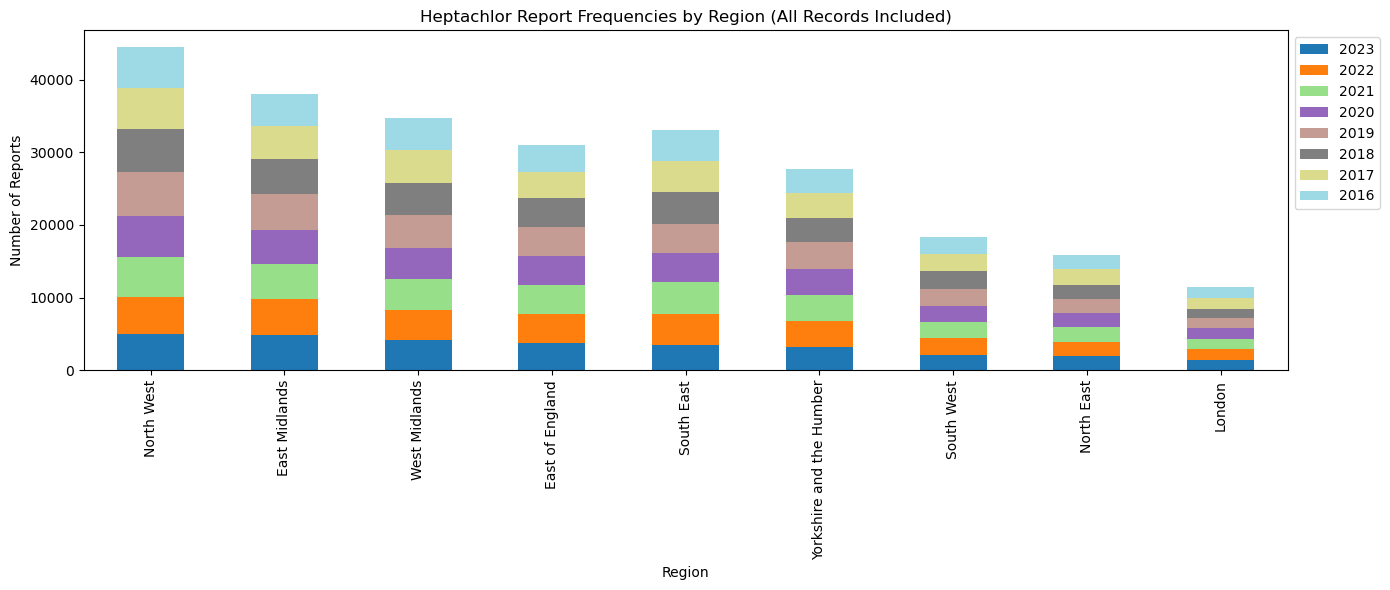

In [97]:
region_freq_df.T.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.title("Heptachlor Report Frequencies by Region (All Records Included)")
plt.ylabel("Number of Reports")
plt.xlabel("Region")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1))
plt.tight_layout()
plt.show()

In [113]:
# Count the occurrence frequency of OPERATOR NAME in all years
operator_all = {}

for year in years:
    df = dfs[year]
    df_filtered = df[df['SUBSTANCE NAME'].str.upper() == 'COPPER']
    
    op_counts = df_filtered['OPERATOR NAME'].value_counts()
    op_counts.name = year
    operator_all[year] = op_counts

df_op_all = pd.DataFrame(operator_all).fillna(0).astype(int).T
df_op_all.index.name = 'Year'

# Calculate the cumulative occurrence times for all years
total_counts_per_operator = df_op_all.sum(axis=0)

# Take the top 20 companies with the highest frequency of appearance
top_20_operators = total_counts_per_operator.sort_values(ascending=False).head(25)

print("The top 20 companies with the highest frequency of appearance and the number of times they appear：")
print(top_20_operators)


The top 20 companies with the highest frequency of appearance and the number of times they appear：
THAMES WATER UTILITIES LTD            178
UNITED UTILITIES WATER PLC            169
SEVERN TRENT WATER LTD                167
Anglian Water                         137
Biffa Waste Services Ltd              122
Suez Recycling And Recovery Uk Ltd    106
Southern Water                         98
Yorkshire Water Services Limited       95
Viridor Waste Management Limited       86
Fcc Recycling (Uk) Limited             73
Veolia ES (UK) Limited                 63
Veolia ES Landfill Limited             62
JOHNSON MATTHEY PLC                    53
Hills Waste Solutions Limited          52
British Sugar Plc                      51
NORTHUMBRIAN WATER LTD                 48
Cleansing Service Group Limited        47
RWE Generation UK Plc                  46
Lincwaste Limited                      46
VIRIDOR WASTE MANAGEMENT LTD           45
Biffa Waste Services Limited           44
Speciality Steel UK

In [104]:
# Only include the frequency of OPERATOR names that exceed the Threshold 
# (i.e., excluding "Below Reporting Threshold")
operator_above = {}

for year in years:
    df = dfs[year]
    df_filtered = df[
        (df['SUBSTANCE NAME'].str.upper() == 'COPPER') &
        (df['QUANTITY RELEASED (kg)'].astype(str).str.upper() != 'BELOW REPORTING THRESHOLD')
    ]
    
    # Numerical processing
    df_filtered['QUANTITY RELEASED (kg)'] = pd.to_numeric(df_filtered['QUANTITY RELEASED (kg)'], errors='coerce')
    df_filtered = df_filtered.dropna(subset=['QUANTITY RELEASED (kg)'])

    op_counts = df_filtered['OPERATOR NAME'].value_counts()
    op_counts.name = year
    operator_above[year] = op_counts

df_op_above = pd.DataFrame(operator_above).fillna(0).astype(int).T
df_op_above.index.name = 'Year'
df_op_above


/var/folders/v4/ll7l29sx2k52mk2_vs_zrm_40000gn/T/ipykernel_17057/3251780740.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['QUANTITY RELEASED (kg)'] = pd.to_numeric(df_filtered['QUANTITY RELEASED (kg)'], errors='coerce')
/var/folders/v4/ll7l29sx2k52mk2_vs_zrm_40000gn/T/ipykernel_17057/3251780740.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['QUANTITY RELEASED (kg)'] = pd.to_numeric(df_filtered['QUANTITY RELEASED (kg)'], errors='coerce')
/var/folders/v4/ll7l29sx2k52mk2_vs

,AGC Chemicals Europe Limited,ANGLIAN WATER SERVICES LTD,Abaris Holdings Ltd,AmeyCespa (AWRP) ODC Limited,AmeyCespa Limited,Andersons Waste Treatment Centre Limited,Anglian Water,Anglian Water Services Limited,Archer Daniels Midland Erith Limited,AstraZeneca UK Limited,...,Viridor Waste Management Limited,WASTENOTTS (RECLAMATION) LTD,WasteCare Limited,Wessex Water,West Burton B Limited,William Blythe Limited,Wychem Limited,Yorkshire Water Services Limited,enfinium Ferrybridge 1 Limited,enfinium Ferrybridge 2 Limited
Year,,,,,,,,,,,,,,,,,,,,,
2023,0,0,0,0,0,0,16,0,0,1,...,0,0,0,5,1,2,1,11,1,1
2022,0,0,0,0,0,0,16,0,0,1,...,0,1,0,5,1,2,1,11,1,1
2021,0,0,0,1,0,0,17,0,0,1,...,1,0,0,5,0,2,1,10,1,0
2020,0,0,0,0,0,1,16,0,0,0,...,1,0,0,5,0,2,0,10,0,0
2019,1,0,1,1,0,0,15,1,1,1,...,3,1,1,5,0,2,0,11,0,0
2018,0,1,1,0,1,0,15,0,0,1,...,1,0,0,5,0,1,1,11,0,0
2017,0,1,1,0,0,0,17,0,0,1,...,1,1,0,5,0,1,1,11,0,0
2016,0,1,1,0,0,0,16,0,0,1,...,1,0,0,5,0,2,1,12,0,0


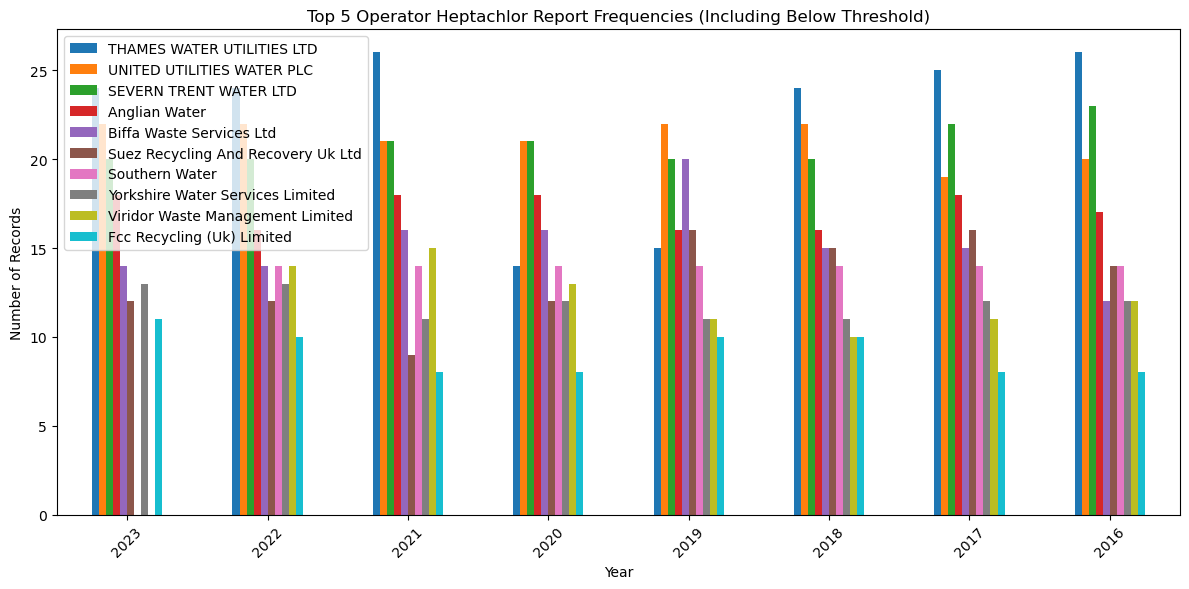

In [109]:
# Identify the top 5 enterprises with the highest overall frequency
top_operators = df_op_all.sum().sort_values(ascending=False).head(10).index

# Extract the time series of these several enterprises
df_op_all[top_operators].plot(kind='bar', figsize=(12, 6))
plt.title("Top 5 Operator Heptachlor Report Frequencies")
plt.ylabel("Number of Records")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
